### Importing libraries

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import json

## Data Preprocessing


### Training Image preprocessing


In [39]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 70295 files belonging to 38 classes.


### Validation Image Preprocessing



In [40]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


## Building Model


In [41]:
cnn = tf.keras.models.Sequential()

In [42]:
cnn.add(tf.keras.layers.Input(shape=[128, 128, 3]))

### Building Convolution Layer


In [43]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [44]:
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [47]:
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [48]:
cnn.add(tf.keras.layers.Dropout(0.25))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4)) # To avoid overfitting

In [49]:
cnn.add(tf.keras.layers.Dense(units=38, activation='softmax'))

### Compiling and Training Phase


In [50]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
            loss='categorical_crossentropy', 
            metrics=['accuracy'])

In [51]:
cnn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)                   │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 126, 126, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 63, 63, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 61, 61, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 30, 30, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 14, 14, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 12, 12, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 6, 6, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1500)                │       3,073,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 1500)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 38)                  │          57,038 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

# Training the model

In [52]:
training_history = cnn.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 2338s 1s/step - accuracy: 0.4231 - loss: 2.0288 - val_accuracy: 0.8224 - val_loss: 0.5752
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1772s 806ms/step - accuracy: 0.8449 - loss: 0.4887 - val_accuracy: 0.8947 - val_loss: 0.3270
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1700s 774ms/step - accuracy: 0.9084 - loss: 0.2840 - val_accuracy: 0.9326 - val_loss: 0.2039
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1656s 753ms/step - accuracy: 0.9394 - loss: 0.1860 - val_accuracy: 0.9521 - val_loss: 0.1461
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1545s 703ms/step - accuracy: 0.9538 - loss: 0.1405 - val_accuracy: 0.9480 - val_loss: 0.1626
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1588s 723ms/step - accuracy: 0.9658 - loss: 0.1025 - val_accuracy: 0.9566 - val_loss: 0.1346
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1589s 723ms/step - accuracy: 0.9729 - loss: 0.0830 - val_accuracy: 0.9550 - val_loss: 0.1425
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 1627s 741ms/step

# Evaluating Model
# Training set Accuracy

In [53]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 520s 237ms/step - accuracy: 0.9914 - loss: 0.0262
Training accuracy: 0.9915925860404968


# Validation set Accuracy

In [54]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('Validation accuracy:', val_acc)

550/550 ━━━━━━━━━━━━━━━━━━━━ 126s 229ms/step - accuracy: 0.9673 - loss: 0.1076
Validation accuracy: 0.9681880474090576


### Saving Model

In [55]:
cnn.save('trained_plant_disease_model.keras')

# Recording History in json

In [56]:
with open('training_hist.json', 'w') as f:
    json.dump(training_history.history, f)
print(training_history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


# Accuracy Visualization

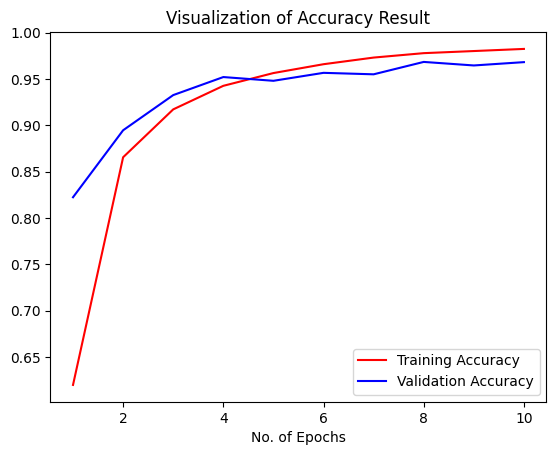

In [57]:
epochs = [i for i in range(1, 11)]
plt.plot(epochs, training_history.history['accuracy'], color='red', label='Training Accuracy')
plt.plot(epochs, training_history.history['val_accuracy'], color='blue', label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

In [58]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=1,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 17572 files belonging to 38 classes.


In [59]:
y_pred = cnn.predict(test_set)
predicted_categories = tf.argmax(y_pred, axis=1)
true_categories = tf.concat([y for x, y in test_set], axis=0)
Y_true = tf.argmax(true_categories, axis=1)

17572/17572 ━━━━━━━━━━━━━━━━━━━━ 248s 14ms/step


## Confusion Matrix and Classification Report

In [69]:
class_names = training_set.class_names
class_name = validation_set.class_names
print(class_name)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

In [70]:
cm = confusion_matrix(Y_true, predicted_categories)
print(classification_report(Y_true, predicted_categories, target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.97      0.97      0.97       440
                                   Apple___healthy       0.98      0.94      0.96       502
                               Blueberry___healthy       0.95      0.99      0.97       454
          Cherry_(including_sour)___Powdery_mildew       0.98      1.00      0.99       421
                 Cherry_(including_sour)___healthy       1.00      0.98      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.96      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.92      0.97      0.

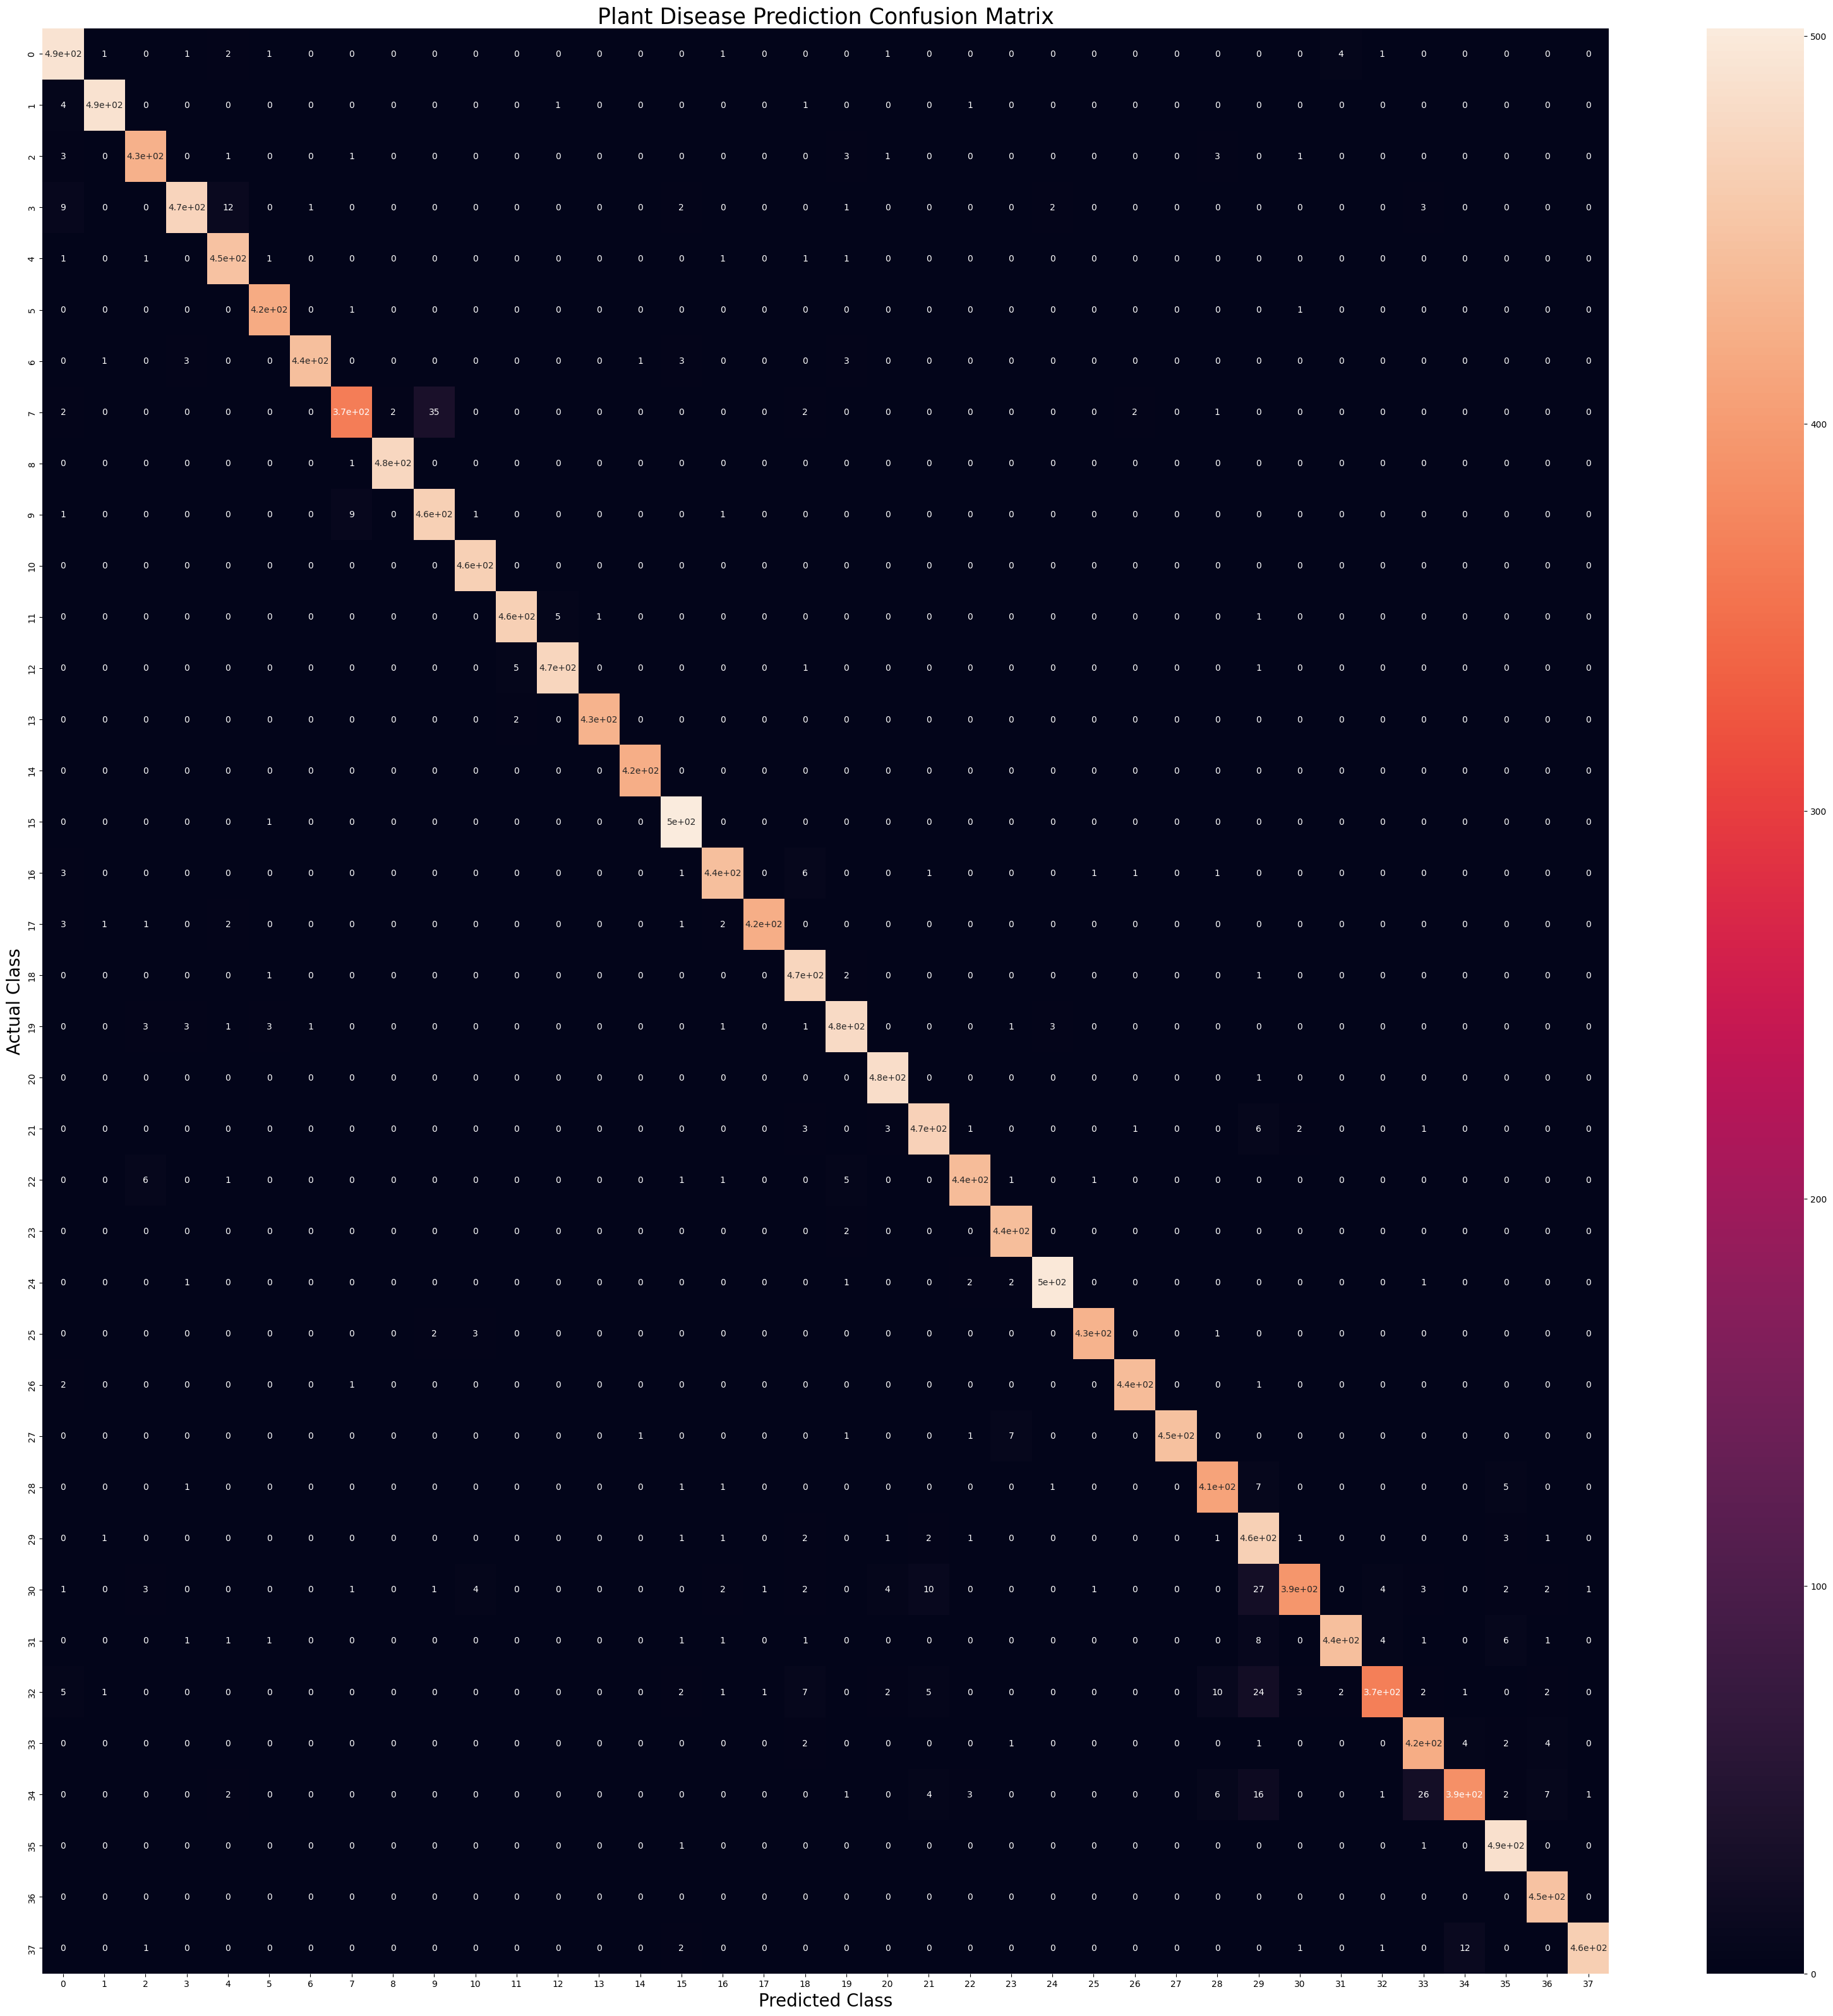

In [73]:
plt.figure(figsize=(40, 40))
sns.heatmap(cm, annot=True, annot_kws={"size": 10})

plt.xlabel('Predicted Class', fontsize=20)
plt.ylabel('Actual Class', fontsize=20)
plt.title('Plant Disease Prediction Confusion Matrix', fontsize=25)
plt.show()